In [1]:
import random
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


Using TensorFlow backend.
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [19]:
zeros = pd.read_csv('probZeroDrug20000_.2_.2_revised.csv')

In [20]:
dataTrain = pd.read_csv('tripleTrain_revised.csv')
dataTest = pd.read_csv('tripleTest_revised.csv')


In [21]:
r,c = zeros.shape

In [22]:
dataTrain = dataTrain.append(zeros.iloc[:int(0.9*r),:], ignore_index = True) 

In [23]:
dataTest = dataTest.append(zeros.iloc[int(0.9*r):,:], ignore_index = True) 

In [24]:
del zeros
# del probableZero

In [25]:
# Shuffle datasets
dataTrain = dataTrain.sample(frac=1).reset_index(drop=True)
dataTest = dataTest.sample(frac=1).reset_index(drop=True)

In [26]:
dataTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,DB00210,DB00749,1,0.001639,0.001632,0.001629,0.001701,0.001589,0.001753,0.002352,...,0.001604,0.001600,0.001817,0.001800,0.001601,0.001579,0.001607,0.001696,0.001591,0.001656
1,DB06288,DB00633,1,0.001609,0.001590,0.001603,0.001580,0.001605,0.001587,0.001596,...,0.002060,0.001626,0.001569,0.001571,0.001687,0.001624,0.001643,0.001598,0.001805,0.002139
2,DB01206,DB00580,0,0.001635,0.001921,0.001610,0.001572,0.001633,0.001575,0.001576,...,0.001594,0.001626,0.001754,0.001801,0.001737,0.001598,0.001606,0.001736,0.001713,0.001600
3,DB00813,DB00450,1,0.001673,0.001689,0.001670,0.001561,0.001618,0.001643,0.001602,...,0.001578,0.001596,0.001740,0.001686,0.001737,0.001574,0.001577,0.002208,0.001601,0.001578
4,DB01186,DB01181,0,0.001591,0.001592,0.001599,0.001603,0.001589,0.001613,0.001611,...,0.001608,0.001596,0.001567,0.001584,0.001617,0.001662,0.001607,0.001638,0.001639,0.001613


In [27]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2].astype(int)
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2].astype(int)
# del dataTest
testNum = len(X_test)

#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

y_train = y_train + 1
y_test  = y_test + 1
# y_train = y_train / 2
# y_test  = y_test / 2
# print(y_train[0], y_test[0])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]


In [28]:
print(y_train[1], y_test[0])

[0. 0. 1.] [0. 1. 0.]


In [67]:
#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense( 3, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
# model.load_weights('model with zeros_3Epoch_revised.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_4 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                222272    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)               

In [68]:
# #### plotting model
# plot_model(model,show_shapes = True, to_file='modelLastDense_3.png')

In [215]:
# #### train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)
# model.fit(X_train, y_train, epochs=10)


Train on 56800 samples, validate on 6310 samples
Epoch 1/1
56800/56800 [==============================] - 403s 7ms/step - loss: 0.0839 - acc: 0.9681 - val_loss: 0.2006 - val_acc: 0.9452


In [216]:
### Saveing the Model
model.save_weights('model with zeros_10Epoch_revised.h5')


In [217]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
# print(predit[:4],X_test[:4,2])

In [218]:
print(predit[:4])

[[1.7059624e-02 2.4314922e-01 3.8662344e-02]
 [4.7683716e-07 2.1457672e-06 9.9326825e-01]
 [2.5692582e-04 9.9491286e-01 4.2617321e-06]
 [3.1020880e-01 9.6577406e-04 3.8400888e-03]]


In [219]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " -1s AUPR and AUC")
print('''
Epoch 03: 72 Aupr
Epoch 04: 76 Aupr
Epoch 05: 78 Aupr
Epoch 06: 79 Aupr
Epoch 07: 80 Aupr
Epoch 08: 82 Aupr
Epoch 09: 81 Aupr
Epoch 10: 82 Aupr
Epoch 11: 79 Aupr
Epoch 12: 79 Aupr
Epoch 13: 80 Aupr
Epoch 13: 81 Aupr
''')

0.8241226651923205 0.9692903041883687  -1s AUPR and AUC

Epoch 03: 72 Aupr
Epoch 04: 76 Aupr
Epoch 05: 78 Aupr
Epoch 06: 79 Aupr
Epoch 07: 80 Aupr
Epoch 08: 82 Aupr
Epoch 09: 81 Aupr
Epoch 10: 82 Aupr
Epoch 11: 79 Aupr
Epoch 12: 79 Aupr
Epoch 13: 80 Aupr
Epoch 13: 81 Aupr



In [220]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,2], predit[:,2])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,2], predit[:,2])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " +1s AUPR and AUC")
print('''
Epoch 03: 95 Aupr
Epoch 04: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 97 Aupr
Epoch 09: 97 Aupr
Epoch 10: 97 Aupr
Epoch 11: 95 Aupr
Epoch 12: 95 Aupr
Epoch 13: 95 Aupr
''')

0.9750785553120068 0.9777484088430572  +1s AUPR and AUC

Epoch 03: 95 Aupr
Epoch 04: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 97 Aupr
Epoch 09: 97 Aupr
Epoch 10: 96 Aupr
Epoch 11: 95 Aupr
Epoch 12: 95 Aupr
Epoch 13: 95 Aupr



In [221]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,1], predit[:,1])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,1], predit[:,1])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " 0s AUPR and AUC")
print('''
Epoch 03: 95 Aupr
Epoch 03: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 96 Aupr
Epoch 09: 97 Aupr
Epoch 10: 96 Aupr
Epoch 11: 96 Aupr
Epoch 12: 96 Aupr
Epoch 13: 96 Aupr
''')

0.9683162413028781 0.9888763341067285  0s AUPR and AUC

Epoch 03: 95 Aupr
Epoch 03: 96 Aupr
Epoch 05: 96 Aupr
Epoch 06: 96 Aupr
Epoch 07: 96 Aupr
Epoch 08: 96 Aupr
Epoch 09: 97 Aupr
Epoch 10: nan Aupr
Epoch 11: 96 Aupr
Epoch 12: 96 Aupr
Epoch 13: 96 Aupr



In [222]:
# print(model.history.history['val_acc'])

In [223]:

# # Plot training & validation accuracy values
# plt.plot(list(range(1,7)),model.history.history['acc'])
# plt.plot(list(range(1,7)),model.history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(list(range(1,7)),model.history.history['loss'])
# plt.plot(list(range(1,7)),model.history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [224]:
# # predit
# predit[:,0].shape 

In [225]:
predicts = []
for a,b,c in predit:
    if a >b and a>c:
        predicts.append(0)
    elif c>a and c>b:
        predicts.append(2)
    else:
        predicts.append(1)

In [226]:
predicts1 = []
e = d = z = 0

for a,b,c in predit:
    if a >=0.95:
        predicts1.append(0)
        d += 1
    elif b>=0.95:
        predicts1.append(2)
        e += 1
    elif a<=0.2 and b<=0.2:
        predicts1.append(1)
        z += 1
    elif c>a and c>b:
        predicts1.append(1)
        z += 1
print('degrassive', d, 'enhancive', e, 'zeros', z)
print('''
Epoch 03: degrassive 195 enhancive 732 zeros 3609
Epoch 04: degrassive 209 enhancive 747 zeros 3649
Epoch 05: degrassive 218 enhancive 720 zeros 3663
Epoch 06: degrassive 244 enhancive 797 zeros 3722
Epoch 07: degrassive 221 enhancive 848 zeros 3721
Epoch 08: degrassive 206 enhancive 729 zeros 3821
Epoch 09: degrassive 155 enhancive 961 zeros 3838
Epoch 10: degrassive 155 enhancive 750 zeros 3960
Epoch 11: degrassive 375 enhancive 1254 zeros 3476
Epoch 12: degrassive 395 enhancive 1093 zeros 3571
Epoch 13: degrassive 273 enhancive 873 zeros 3590
''')

degrassive 155 enhancive 750 zeros 3960

Epoch 03: degrassive 195 enhancive 732 zeros 3609
Epoch 04: degrassive 209 enhancive 747 zeros 3649
Epoch 05: degrassive 218 enhancive 720 zeros 3663
Epoch 06: degrassive 244 enhancive 797 zeros 3722
Epoch 07: degrassive 221 enhancive 848 zeros 3721
Epoch 08: degrassive 206 enhancive 729 zeros 3821
Epoch 09: degrassive 155 enhancive 961 zeros 3838
Epoch 10: degrassive 72 enhancive 5 zeros 3571
Epoch 11: degrassive 375 enhancive 1254 zeros 3476
Epoch 12: degrassive 395 enhancive 1093 zeros 3571
Epoch 13: degrassive 273 enhancive 873 zeros 3590



In [227]:
# max(list((dataTest.values[:,2]+1)/2))

[[ 723   17   67]
 [  79 1944   32]
 [ 112   39 3297]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       914
           1       0.95      0.97      0.96      2000
           2       0.96      0.97      0.96      3396

    accuracy                           0.95      6310
   macro avg       0.93      0.91      0.92      6310
weighted avg       0.94      0.95      0.94      6310



/home/amin/confusion_matrix_pretty_print.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/home/amin/confusion_matrix_pretty_print.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/home/amin/confusion_matrix_pretty_print.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/home/amin/confusion_matrix_pretty_print.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


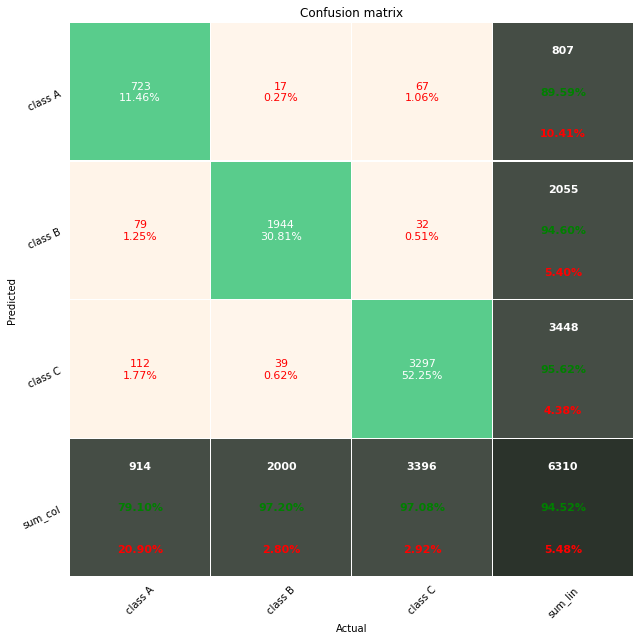


Epoch 03: 
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       914
           1       0.93      0.94      0.93      2000
           2       0.92      0.95      0.93      3396
Epoch 04:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       914
           1       0.93      0.95      0.94      2000
           2       0.93      0.96      0.95      3396
Epoch 05:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       914
           1       0.94      0.97      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 06:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       914
           1       0.94      0.96      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 07:
              precision    recall  f1-score   support

           0       0.87  

In [228]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)),list(predicts))
print(CR)
# print((92+90+140+67+42+81)/(6950))
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)), list(predicts))
plt.show()
print("""
Epoch 03: 
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       914
           1       0.93      0.94      0.93      2000
           2       0.92      0.95      0.93      3396
Epoch 04:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       914
           1       0.93      0.95      0.94      2000
           2       0.93      0.96      0.95      3396
Epoch 05:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       914
           1       0.94      0.97      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 06:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       914
           1       0.94      0.96      0.95      2000
           2       0.95      0.96      0.95      3396
Epoch 07:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       914
           1       0.94      0.97      0.95      2000
           2       0.96      0.96      0.96      3396
Epoch 08: 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       914
           1       0.95      0.97      0.96      2000
           2       0.95      0.96      0.96      3396
Epoch 09:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       914
           1       0.93      0.98      0.95      2000
           2       0.96      0.97      0.96      3396
Epoch 10:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       914
           1       0.95      0.97      0.96      2000
           2       0.96      0.97      0.96      3396
""")

In [229]:
# print(pd.DataFrame(predit))

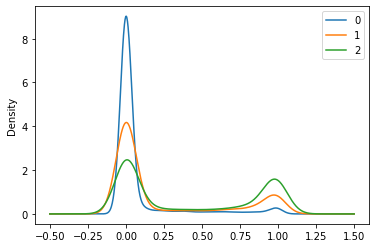

In [230]:
pd.DataFrame(predit).plot.density()
plt.show()

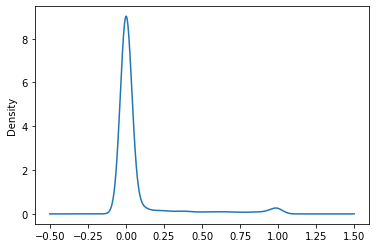

In [231]:
pd.DataFrame(predit).iloc[:,0].plot.density()
plt.show()

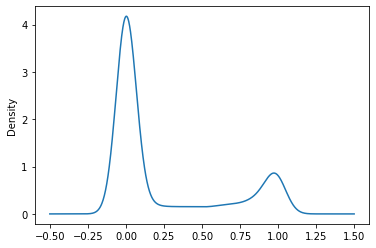

In [232]:
pd.DataFrame(predit).iloc[:,1].plot.density()
plt.show()

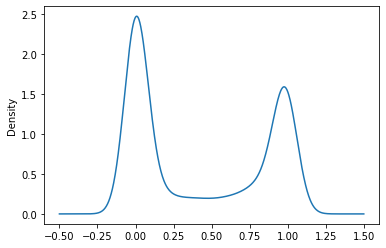

In [233]:
pd.DataFrame(predit).iloc[:,2].plot.density()
plt.show()

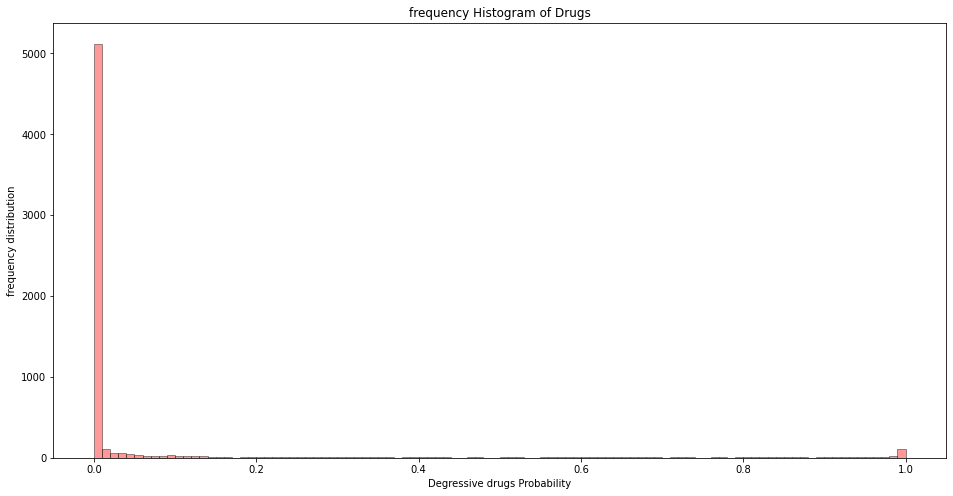

In [234]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

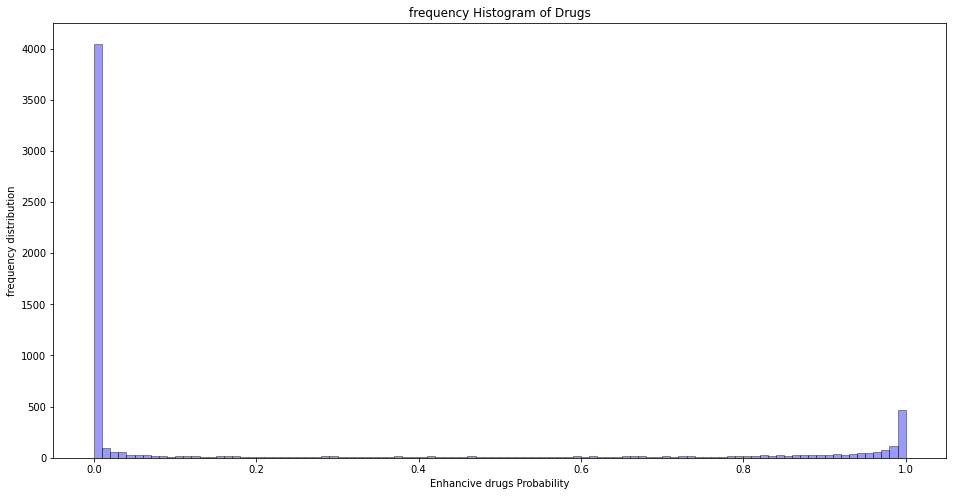

In [235]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

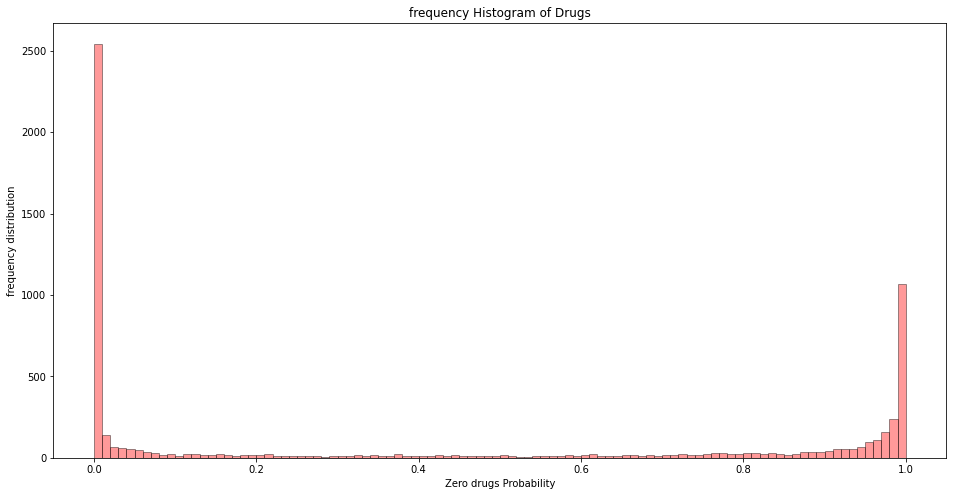

In [236]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,2], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Zero drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

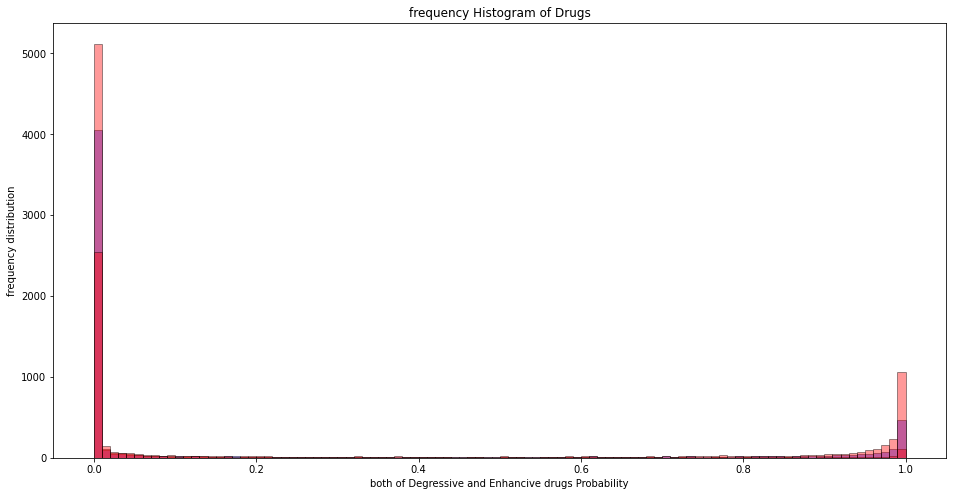

In [237]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,2], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()